# Real Estate dataset
### Creating a multiple Linear Regression model using sklearn library of python 
### Dealing with dummy variables in predicting the price of the real estate property to predict how the price of the real estate property changes with size,year and view 

### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

### Load the data

In [2]:
raw_data=pd.read_csv('real_estate_price_size_year_view.csv')
## Exploring the data 
raw_data.head(6)

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
5,245050.280,575.19,2006,Sea view


In [3]:
## Dealing with dummy variables under the column 'view'
# Mapping the data:- 'No sea view' as 0 , 'Sea view 'as 1
data=raw_data.copy()
data['view']=data['view'].map({'No sea view':0,'Sea view':1})
data.head(6)

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
5,245050.280,575.19,2006,1


In [4]:
# Using describe() function a detailed description of the dataset can be printed
data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


### Plotting the data

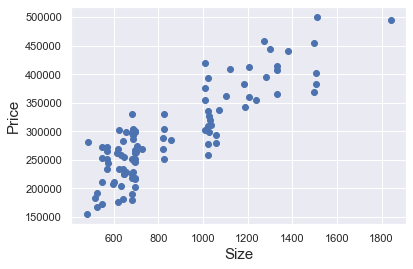

In [5]:
plt.scatter(data['size'],data['price'])
plt.xlabel('Size',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Regression

### Declaring the dependent and independent variables

In [6]:
y=data['price']
x=data[['size','year','view']]

### Standardization

In [7]:
# Importing the preprocessing module
from sklearn.preprocessing import StandardScaler
# Creating an instance of the class StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

### Creating the regression model

In [8]:
reg=LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

#### Finding the intercept

In [9]:
reg.intercept_

292289.4701599997

#### Finding the coefficients

In [10]:
reg.coef_

array([66117.38856853, 12793.51409608, 28357.33672984])

#### Calculating the R_squared

In [11]:
reg.score(x_scaled,y)

0.9128639058979645

#### Calculating adjusted R_squared

In [12]:
def r2_adj(x,y):
    r2=reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
    

In [13]:
r2_adj(x_scaled,y)
#r2 is only slightly greater than adjusted_r2 which means that we are not penalized with the inclusion of 3 independent variables

0.9101409029572759

### Making Prediction with the above model

In [14]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of size,year,view
new_data = pd.DataFrame(data=[[800,2009,1],[800,2009,0]],columns=['Size','Year','View'])

In [15]:
new_data_scaled=scaler.transform(new_data)
predicted_price=reg.predict(new_data_scaled)

In [16]:
new_data['Predicted prices']=predicted_price.round(3)
new_data

,Size,Year,View,Predicted prices
0,800,2009,1,299605.451
1,800,2009,0,242879.431


### Calculating the p values of the variables

In [17]:
from sklearn.feature_selection import f_regression

In [18]:
f_regression(x_scaled,y)

(array([285.92105192,   0.85525799,  20.25908753]),
 array([8.12763222e-31, 3.57340758e-01, 1.86445030e-05]))

In [19]:
p_values=f_regression(x_scaled,y)[1]
p_values.round(3)

array([0.   , 0.357, 0.   ])

### Creating a summary table

In [20]:
reg_summary=pd.DataFrame(data=x.columns.values,columns=['Features'])
reg_summary['Coefficients']=reg.coef_
reg_summary['p values']=p_values.round(3)
reg_summary
#It seems that 'Year' is not event significant(p_value>0.05), therefore we should remove it from the model.
# 'Year' can be removed from the LinearRegression model

,Features,Coefficients,p values
0,size,66117.388569,0.000
1,year,12793.514096,0.357
2,view,28357.336730,0.000


### Plotting the data along with fitted model

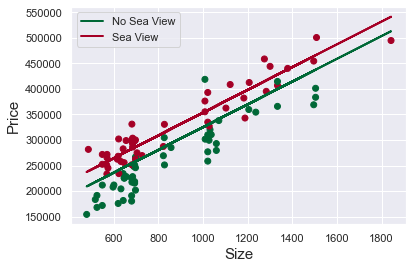

In [21]:
plt.scatter(x['size'],y,c=x['view'],cmap='RdYlGn_r')
# Define the two regression equations, depending on whether they property has sea view or not
y_no=reg.coef_[0]*x_scaled[:,0]+reg.coef_[2]*0.0+reg.intercept_
y_yes=reg.coef_[0]*x_scaled[:,0]+reg.coef_[2]*1.0+reg.intercept_
# plotting the two regression lines
fig=plt.plot(x['size'],y_no,lw=2,color='#006837',label='No Sea View')
fig=plt.plot(x['size'],y_yes,lw=2,color='#a50026',label='Sea View')
plt.legend()
plt.xlabel('Size',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()



In [22]:
# Thus, For the same size, Properties with the sea view are costlier than those with no sea view